In [1]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dati = pd.read_csv("datasets/CleanData_No2.csv")

In [3]:
dati

,datetime,NO2 (Biossido di azoto)
0,2020-01-01 00:00:00,16.0
1,2020-01-01 1:00:00,26.0
2,2020-01-01 2:00:00,25.0
3,2020-01-01 3:00:00,24.0
4,2020-01-01 4:00:00,32.0
...,...,...
6930,2020-10-15 20:00:00,43.0
6931,2020-10-15 21:00:00,37.0
6932,2020-10-15 22:00:00,38.0
6933,2020-10-15 23:00:00,33.0


In [4]:
dati_serie = dati['NO2 (Biossido di azoto)']

In [5]:
type(dati_serie)

pandas.core.series.Series

### Data prep. for ARIMA

In [6]:
X = dati['NO2 (Biossido di azoto)'].values
type(X)

numpy.ndarray

In [7]:
train, test = X[:6900], X[6900:]
test.shape

(35,)

In [8]:
prediction = []

In [9]:
history = [x for x in train]

In [10]:
for t in range(len(test)): 
    model = ARIMA(history, order = (2, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    history.append(test[t])
    prediction.append(yhat)
    print(yhat, test[t])

[45.00695861] 52.0
[51.49481115] 35.0
[30.06427503] 38.0
[42.21789061] 65.0
[69.92997292] 75.0
[70.41157294] 74.0
[68.80972161] 51.0
[42.18832373] 48.0
[47.65445242] 52.0
[50.61473995] 49.0
[46.0104534] 38.0
[36.34437525] 27.0
[28.06033549] 26.0
[30.62375343] 23.0
[26.66080704] 16.0
[20.38542795] 30.0
[39.66917712] 50.0
[55.71031902] 55.0
[54.60765402] 45.0
[42.7044556] 29.0
[27.50122273] 27.0
[30.14581338] 27.0
[29.21323796] 23.0
[25.30880705] 25.0
[30.11744476] 29.0
[33.37610075] 30.0
[33.14489644] 26.0
[28.37671847] 39.0
[44.91720098] 41.0
[40.55012843] 47.0
[48.30134184] 43.0
[40.72591807] 37.0
[35.65035279] 38.0
[38.82095029] 33.0
[31.64724506] 30.0


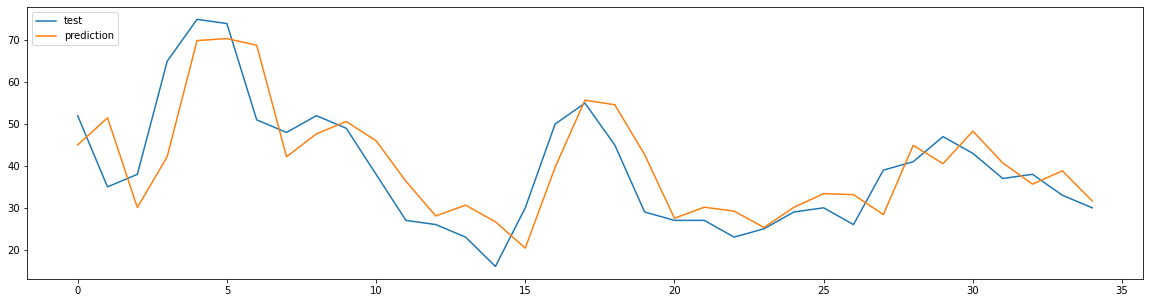

In [11]:
plt.figure(figsize = (20, 5))
plt.plot(test, "-", label = "test")
plt.plot(prediction, "-", label = "prediction")
plt.legend(loc="upper left")
plt.show()

### Prediction performance MAE(Mean Absolute Error)

In [12]:
mae = np.mean(abs(prediction - test))

In [13]:
mae

14.734041423908684